# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 2289 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (   0 of 2289) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   6 of 2289) |                       | Elapsed Time: 0:00:27 ETA: 2:52:20

  0% (  20 of 2289) |                       | Elapsed Time: 0:00:27 ETA: 0:51:47

  1% (  36 of 2289) |                       | Elapsed Time: 0:00:27 ETA: 0:28:51

  2% (  50 of 2289) |                       | Elapsed Time: 0:00:27 ETA: 0:20:48

  2% (  65 of 2289) |                       | Elapsed Time: 0:00:28 ETA: 0:00:35

  3% (  79 of 2289) |                       | Elapsed Time: 0:00:28 ETA: 0:00:35

  4% (  94 of 2289) |                       | Elapsed Time: 0:00:28 ETA: 0:00:33

  4% ( 108 of 2289) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:33

  5% ( 122 of 2289) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:33

  5% ( 135 of 2289) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:34

  6% ( 151 of 2289) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:33

  7% ( 166 of 2289) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:33

  7% ( 179 of 2289) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:33

  8% ( 193 of 2289) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:33

  9% ( 207 of 2289) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:33

  9% ( 221 of 2289) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:32

 10% ( 236 of 2289) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:32

 10% ( 250 of 2289) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:32

 11% ( 265 of 2289) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:31

 12% ( 279 of 2289) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:31

 12% ( 293 of 2289) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:31

 13% ( 307 of 2289) |###                    | Elapsed Time: 0:00:31 ETA: 0:00:31

 14% ( 322 of 2289) |###                    | Elapsed Time: 0:00:32 ETA: 0:00:31

 14% ( 336 of 2289) |###                    | Elapsed Time: 0:00:32 ETA: 0:00:31

 15% ( 351 of 2289) |###                    | Elapsed Time: 0:00:32 ETA: 0:00:30

 15% ( 365 of 2289) |###                    | Elapsed Time: 0:00:32 ETA: 0:00:30

 16% ( 379 of 2289) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:30

 17% ( 393 of 2289) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:29

 17% ( 408 of 2289) |####                   | Elapsed Time: 0:00:33 ETA: 0:00:28

 18% ( 422 of 2289) |####                   | Elapsed Time: 0:00:33 ETA: 0:00:28

 19% ( 437 of 2289) |####                   | Elapsed Time: 0:00:33 ETA: 0:00:28

 19% ( 450 of 2289) |####                   | Elapsed Time: 0:00:34 ETA: 0:00:28

 20% ( 465 of 2289) |####                   | Elapsed Time: 0:00:34 ETA: 0:00:28

 20% ( 479 of 2289) |####                   | Elapsed Time: 0:00:34 ETA: 0:00:28

 21% ( 494 of 2289) |####                   | Elapsed Time: 0:00:34 ETA: 0:00:27

 22% ( 508 of 2289) |#####                  | Elapsed Time: 0:00:35 ETA: 0:00:27

 22% ( 523 of 2289) |#####                  | Elapsed Time: 0:00:35 ETA: 0:00:26

 23% ( 537 of 2289) |#####                  | Elapsed Time: 0:00:35 ETA: 0:00:26

 24% ( 551 of 2289) |#####                  | Elapsed Time: 0:00:35 ETA: 0:00:26

 24% ( 565 of 2289) |#####                  | Elapsed Time: 0:00:35 ETA: 0:00:26

 25% ( 580 of 2289) |#####                  | Elapsed Time: 0:00:36 ETA: 0:00:26

 26% ( 601 of 2289) |######                 | Elapsed Time: 0:00:36 ETA: 0:00:25

 26% ( 615 of 2289) |######                 | Elapsed Time: 0:00:36 ETA: 0:00:25

 27% ( 630 of 2289) |######                 | Elapsed Time: 0:00:36 ETA: 0:00:25

 28% ( 645 of 2289) |######                 | Elapsed Time: 0:00:37 ETA: 0:00:24

 28% ( 659 of 2289) |######                 | Elapsed Time: 0:00:37 ETA: 0:00:24

 29% ( 673 of 2289) |######                 | Elapsed Time: 0:00:37 ETA: 0:00:24

 30% ( 687 of 2289) |######                 | Elapsed Time: 0:00:37 ETA: 0:00:23

 30% ( 701 of 2289) |#######                | Elapsed Time: 0:00:38 ETA: 0:00:24

 31% ( 716 of 2289) |#######                | Elapsed Time: 0:00:38 ETA: 0:00:23

 31% ( 730 of 2289) |#######                | Elapsed Time: 0:00:38 ETA: 0:00:24

 32% ( 744 of 2289) |#######                | Elapsed Time: 0:00:38 ETA: 0:00:24

 33% ( 758 of 2289) |#######                | Elapsed Time: 0:00:38 ETA: 0:00:23

 33% ( 773 of 2289) |#######                | Elapsed Time: 0:00:39 ETA: 0:00:23

 34% ( 787 of 2289) |#######                | Elapsed Time: 0:00:39 ETA: 0:00:23

 35% ( 802 of 2289) |########               | Elapsed Time: 0:00:39 ETA: 0:00:23

 35% ( 815 of 2289) |########               | Elapsed Time: 0:00:39 ETA: 0:00:23

 36% ( 830 of 2289) |########               | Elapsed Time: 0:00:40 ETA: 0:00:23

 36% ( 844 of 2289) |########               | Elapsed Time: 0:00:40 ETA: 0:00:22

 37% ( 859 of 2289) |########               | Elapsed Time: 0:00:40 ETA: 0:00:22

 38% ( 873 of 2289) |########               | Elapsed Time: 0:00:40 ETA: 0:00:22

 38% ( 887 of 2289) |########               | Elapsed Time: 0:00:40 ETA: 0:00:21

 39% ( 901 of 2289) |#########              | Elapsed Time: 0:00:41 ETA: 0:00:21

 40% ( 916 of 2289) |#########              | Elapsed Time: 0:00:41 ETA: 0:00:21

 40% ( 930 of 2289) |#########              | Elapsed Time: 0:00:41 ETA: 0:00:21

 41% ( 945 of 2289) |#########              | Elapsed Time: 0:00:41 ETA: 0:00:21

 41% ( 959 of 2289) |#########              | Elapsed Time: 0:00:42 ETA: 0:00:20

 42% ( 973 of 2289) |#########              | Elapsed Time: 0:00:42 ETA: 0:00:20

 43% ( 987 of 2289) |#########              | Elapsed Time: 0:00:42 ETA: 0:00:19

 43% (1002 of 2289) |##########             | Elapsed Time: 0:00:42 ETA: 0:00:20

 44% (1016 of 2289) |##########             | Elapsed Time: 0:00:42 ETA: 0:00:19

 45% (1031 of 2289) |##########             | Elapsed Time: 0:00:43 ETA: 0:00:19

 45% (1045 of 2289) |##########             | Elapsed Time: 0:00:43 ETA: 0:00:19

 46% (1059 of 2289) |##########             | Elapsed Time: 0:00:43 ETA: 0:00:19

 46% (1073 of 2289) |##########             | Elapsed Time: 0:00:43 ETA: 0:00:18

 47% (1088 of 2289) |##########             | Elapsed Time: 0:00:44 ETA: 0:00:18

 48% (1102 of 2289) |###########            | Elapsed Time: 0:00:44 ETA: 0:00:17

 48% (1116 of 2289) |###########            | Elapsed Time: 0:00:44 ETA: 0:00:17

 49% (1130 of 2289) |###########            | Elapsed Time: 0:00:44 ETA: 0:00:17

 50% (1145 of 2289) |###########            | Elapsed Time: 0:00:44 ETA: 0:00:17

 50% (1159 of 2289) |###########            | Elapsed Time: 0:00:45 ETA: 0:00:17

 51% (1174 of 2289) |###########            | Elapsed Time: 0:00:45 ETA: 0:00:17

 51% (1188 of 2289) |###########            | Elapsed Time: 0:00:45 ETA: 0:00:17

 52% (1202 of 2289) |############           | Elapsed Time: 0:00:45 ETA: 0:00:16

 53% (1215 of 2289) |############           | Elapsed Time: 0:00:46 ETA: 0:00:16

 53% (1231 of 2289) |############           | Elapsed Time: 0:00:46 ETA: 0:00:16

 54% (1245 of 2289) |############           | Elapsed Time: 0:00:46 ETA: 0:00:16

 55% (1259 of 2289) |############           | Elapsed Time: 0:00:46 ETA: 0:00:16

 55% (1273 of 2289) |############           | Elapsed Time: 0:00:46 ETA: 0:00:15

 56% (1288 of 2289) |############           | Elapsed Time: 0:00:47 ETA: 0:00:15

 56% (1302 of 2289) |#############          | Elapsed Time: 0:00:47 ETA: 0:00:15

 57% (1317 of 2289) |#############          | Elapsed Time: 0:00:47 ETA: 0:00:15

 58% (1331 of 2289) |#############          | Elapsed Time: 0:00:47 ETA: 0:00:14

 58% (1345 of 2289) |#############          | Elapsed Time: 0:00:48 ETA: 0:00:14

 59% (1359 of 2289) |#############          | Elapsed Time: 0:00:48 ETA: 0:00:14

 60% (1374 of 2289) |#############          | Elapsed Time: 0:00:48 ETA: 0:00:14

 60% (1388 of 2289) |#############          | Elapsed Time: 0:00:48 ETA: 0:00:13

 61% (1403 of 2289) |##############         | Elapsed Time: 0:00:48 ETA: 0:00:13

 61% (1418 of 2289) |##############         | Elapsed Time: 0:00:49 ETA: 0:00:13

 62% (1431 of 2289) |##############         | Elapsed Time: 0:00:49 ETA: 0:00:13

 63% (1446 of 2289) |##############         | Elapsed Time: 0:00:49 ETA: 0:00:12

 63% (1460 of 2289) |##############         | Elapsed Time: 0:00:50 ETA: 0:00:22

 64% (1474 of 2289) |##############         | Elapsed Time: 0:00:50 ETA: 0:00:21

 65% (1488 of 2289) |##############         | Elapsed Time: 0:00:51 ETA: 0:00:21

 65% (1502 of 2289) |###############        | Elapsed Time: 0:00:51 ETA: 0:00:22

 66% (1517 of 2289) |###############        | Elapsed Time: 0:00:51 ETA: 0:00:11

 66% (1531 of 2289) |###############        | Elapsed Time: 0:00:51 ETA: 0:00:11

 67% (1546 of 2289) |###############        | Elapsed Time: 0:00:51 ETA: 0:00:11

 68% (1560 of 2289) |###############        | Elapsed Time: 0:00:52 ETA: 0:00:11

 68% (1574 of 2289) |###############        | Elapsed Time: 0:00:52 ETA: 0:00:11

 69% (1588 of 2289) |###############        | Elapsed Time: 0:00:52 ETA: 0:00:11

 70% (1603 of 2289) |################       | Elapsed Time: 0:00:52 ETA: 0:00:10

 70% (1617 of 2289) |################       | Elapsed Time: 0:00:53 ETA: 0:00:10

 71% (1631 of 2289) |################       | Elapsed Time: 0:00:53 ETA: 0:00:10

 71% (1645 of 2289) |################       | Elapsed Time: 0:00:53 ETA: 0:00:09

 72% (1660 of 2289) |################       | Elapsed Time: 0:00:53 ETA: 0:00:09

 73% (1674 of 2289) |################       | Elapsed Time: 0:00:53 ETA: 0:00:09

 73% (1689 of 2289) |################       | Elapsed Time: 0:00:54 ETA: 0:00:09

 74% (1703 of 2289) |#################      | Elapsed Time: 0:00:54 ETA: 0:00:08

 75% (1717 of 2289) |#################      | Elapsed Time: 0:00:54 ETA: 0:00:08

 75% (1731 of 2289) |#################      | Elapsed Time: 0:00:54 ETA: 0:00:08

 76% (1746 of 2289) |#################      | Elapsed Time: 0:00:55 ETA: 0:00:08

 76% (1760 of 2289) |#################      | Elapsed Time: 0:00:55 ETA: 0:00:08

 77% (1774 of 2289) |#################      | Elapsed Time: 0:00:55 ETA: 0:00:07

 78% (1788 of 2289) |#################      | Elapsed Time: 0:00:55 ETA: 0:00:07

 78% (1803 of 2289) |##################     | Elapsed Time: 0:00:55 ETA: 0:00:07

 79% (1817 of 2289) |##################     | Elapsed Time: 0:00:56 ETA: 0:00:07

 80% (1832 of 2289) |##################     | Elapsed Time: 0:00:56 ETA: 0:00:06

 80% (1844 of 2289) |##################     | Elapsed Time: 0:00:56 ETA: 0:00:06

 81% (1860 of 2289) |##################     | Elapsed Time: 0:00:56 ETA: 0:00:06

 81% (1874 of 2289) |##################     | Elapsed Time: 0:00:57 ETA: 0:00:06

 82% (1889 of 2289) |##################     | Elapsed Time: 0:00:57 ETA: 0:00:06

 83% (1901 of 2289) |###################    | Elapsed Time: 0:00:57 ETA: 0:00:06

 83% (1918 of 2289) |###################    | Elapsed Time: 0:00:57 ETA: 0:00:05

 84% (1932 of 2289) |###################    | Elapsed Time: 0:00:57 ETA: 0:00:05

 85% (1946 of 2289) |###################    | Elapsed Time: 0:00:58 ETA: 0:00:05

 85% (1960 of 2289) |###################    | Elapsed Time: 0:00:58 ETA: 0:00:05

 86% (1975 of 2289) |###################    | Elapsed Time: 0:00:58 ETA: 0:00:04

 86% (1989 of 2289) |###################    | Elapsed Time: 0:00:58 ETA: 0:00:04

 87% (2003 of 2289) |####################   | Elapsed Time: 0:00:59 ETA: 0:00:04

 88% (2017 of 2289) |####################   | Elapsed Time: 0:00:59 ETA: 0:00:04

 88% (2032 of 2289) |####################   | Elapsed Time: 0:00:59 ETA: 0:00:04

 89% (2045 of 2289) |####################   | Elapsed Time: 0:00:59 ETA: 0:00:03

 90% (2061 of 2289) |####################   | Elapsed Time: 0:00:59 ETA: 0:00:03

 90% (2074 of 2289) |####################   | Elapsed Time: 0:01:00 ETA: 0:00:03

 91% (2089 of 2289) |####################   | Elapsed Time: 0:01:00 ETA: 0:00:03

 91% (2103 of 2289) |#####################  | Elapsed Time: 0:01:00 ETA: 0:00:02

 92% (2118 of 2289) |#####################  | Elapsed Time: 0:01:00 ETA: 0:00:02

 93% (2132 of 2289) |#####################  | Elapsed Time: 0:01:01 ETA: 0:00:02

 93% (2146 of 2289) |#####################  | Elapsed Time: 0:01:01 ETA: 0:00:02

 94% (2160 of 2289) |#####################  | Elapsed Time: 0:01:01 ETA: 0:00:01

 95% (2175 of 2289) |#####################  | Elapsed Time: 0:01:01 ETA: 0:00:01

 95% (2189 of 2289) |#####################  | Elapsed Time: 0:01:01 ETA: 0:00:01

 96% (2204 of 2289) |###################### | Elapsed Time: 0:01:02 ETA: 0:00:01

 96% (2218 of 2289) |###################### | Elapsed Time: 0:01:02 ETA: 0:00:01

 97% (2232 of 2289) |###################### | Elapsed Time: 0:01:02 ETA: 0:00:00

 98% (2246 of 2289) |###################### | Elapsed Time: 0:01:02 ETA: 0:00:00

 98% (2261 of 2289) |###################### | Elapsed Time: 0:01:03 ETA: 0:00:00

 99% (2275 of 2289) |###################### | Elapsed Time: 0:01:03 ETA: 0:00:00

100% (2289 of 2289) |######################| Elapsed Time: 0:01:03 Time: 0:01:03


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | **  | ns. |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | **  | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *   | *** | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


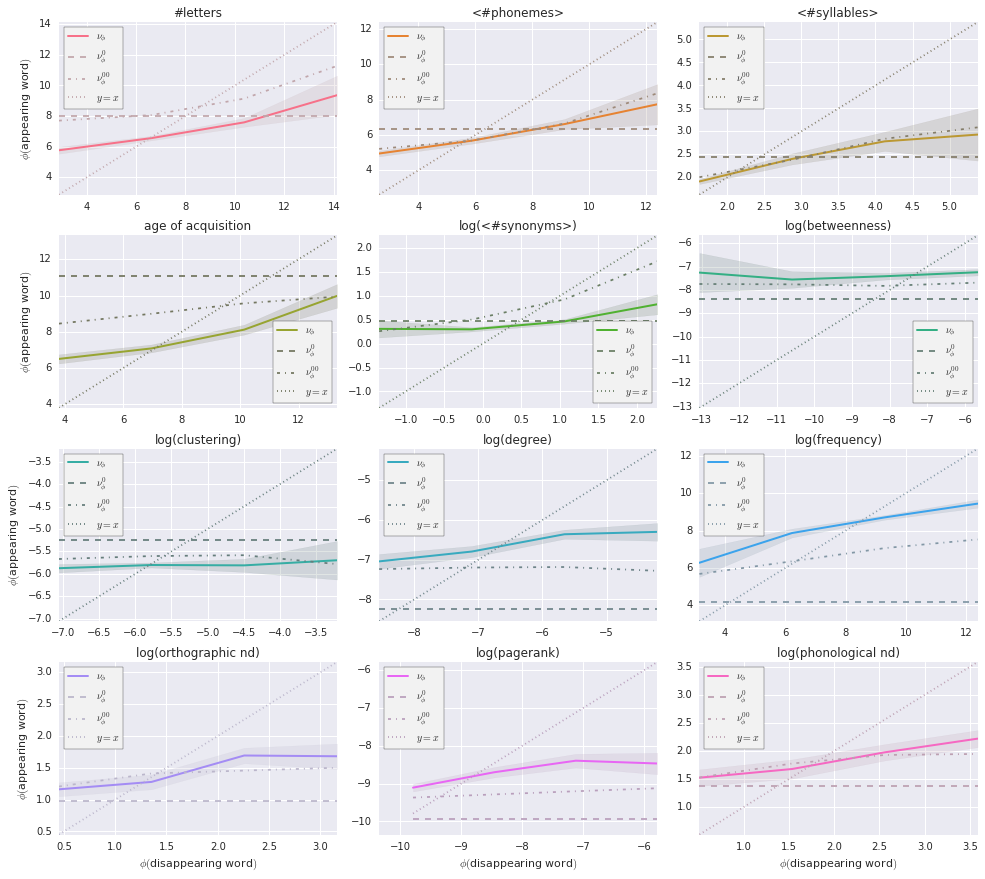

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

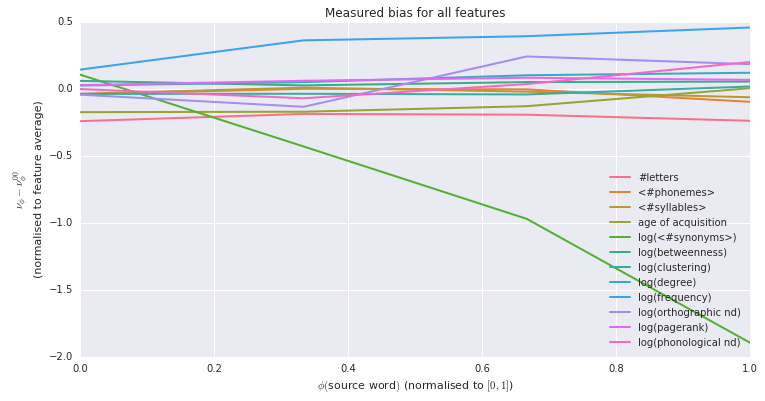

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | *** | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *   | *** | ns. |


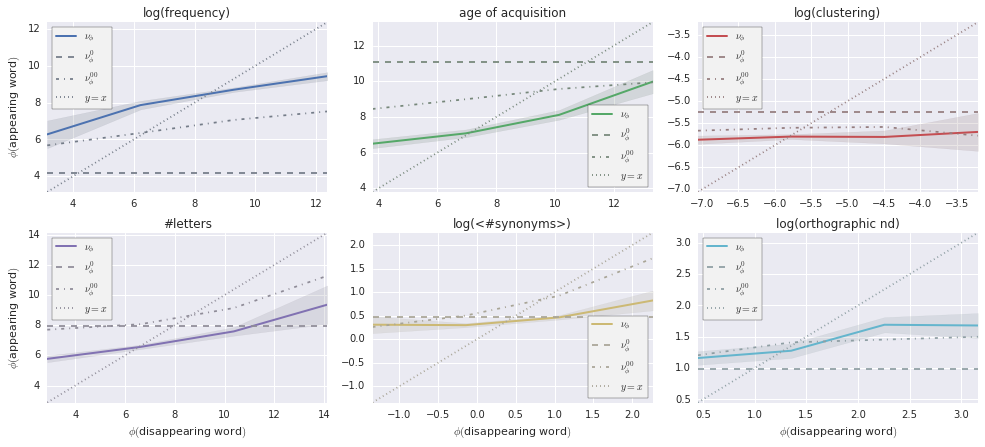

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

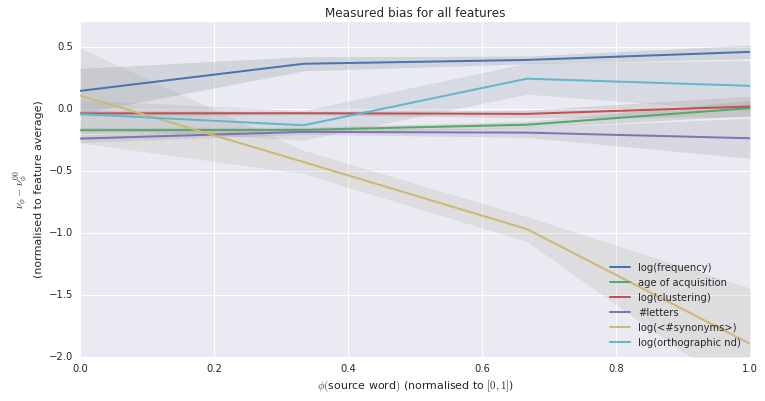

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


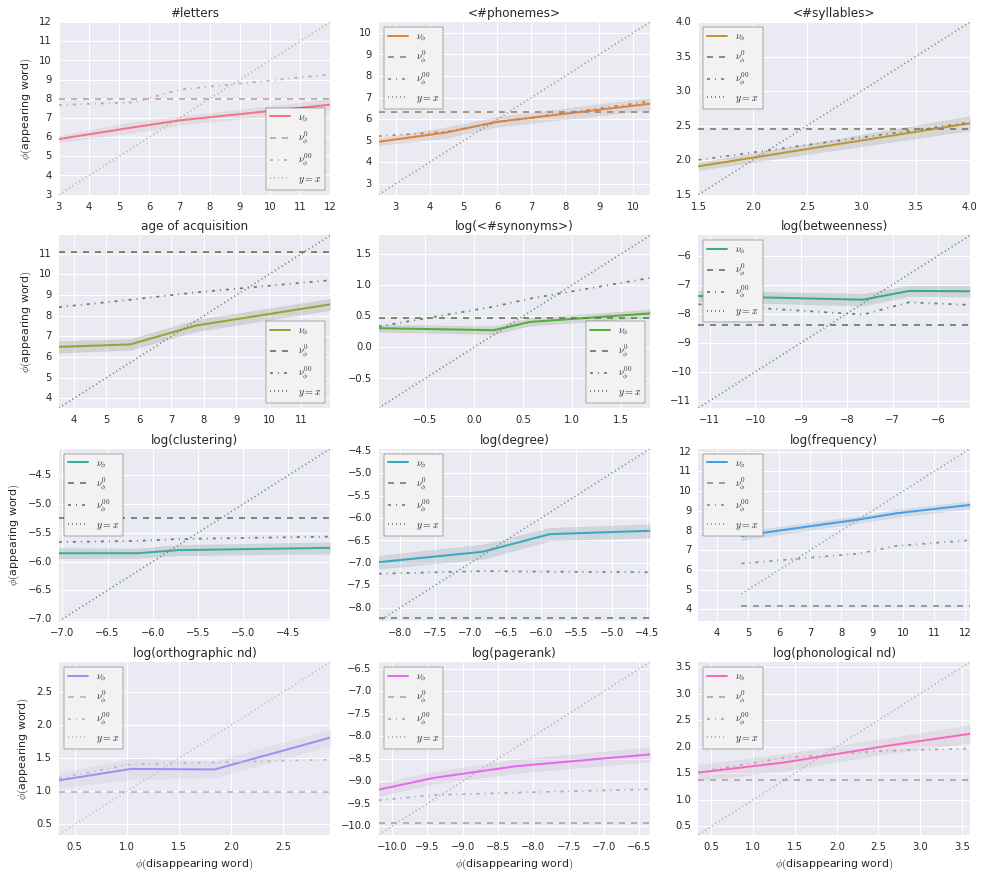

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

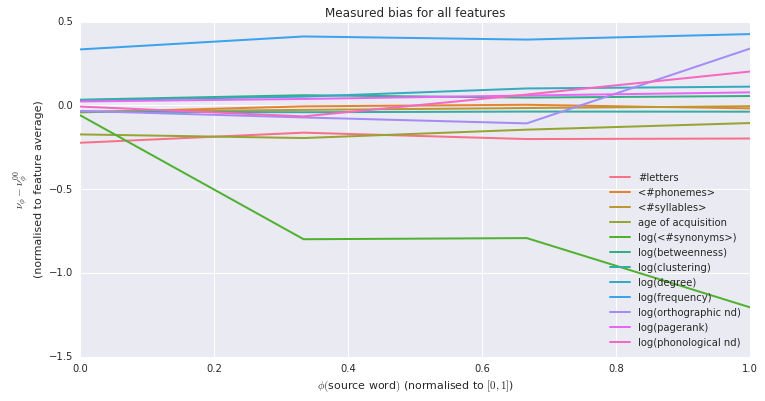

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


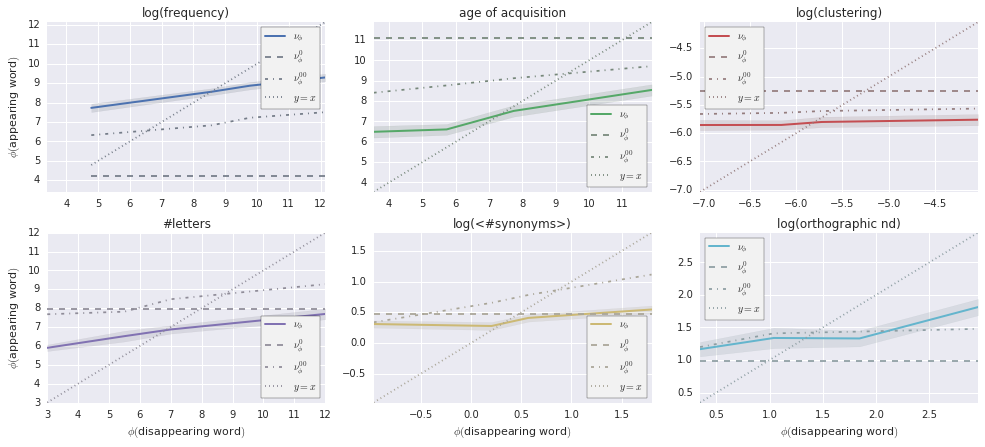

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

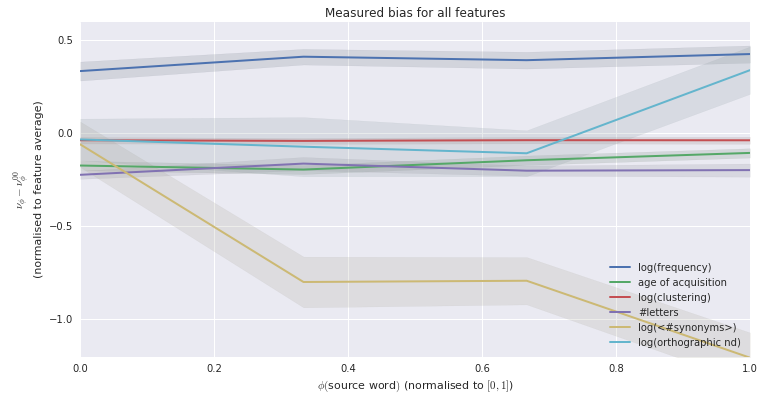

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *   | ns. |
H_00 | ns. | **  | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *   | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | **  | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | ns. | *   | ns. | ns. |


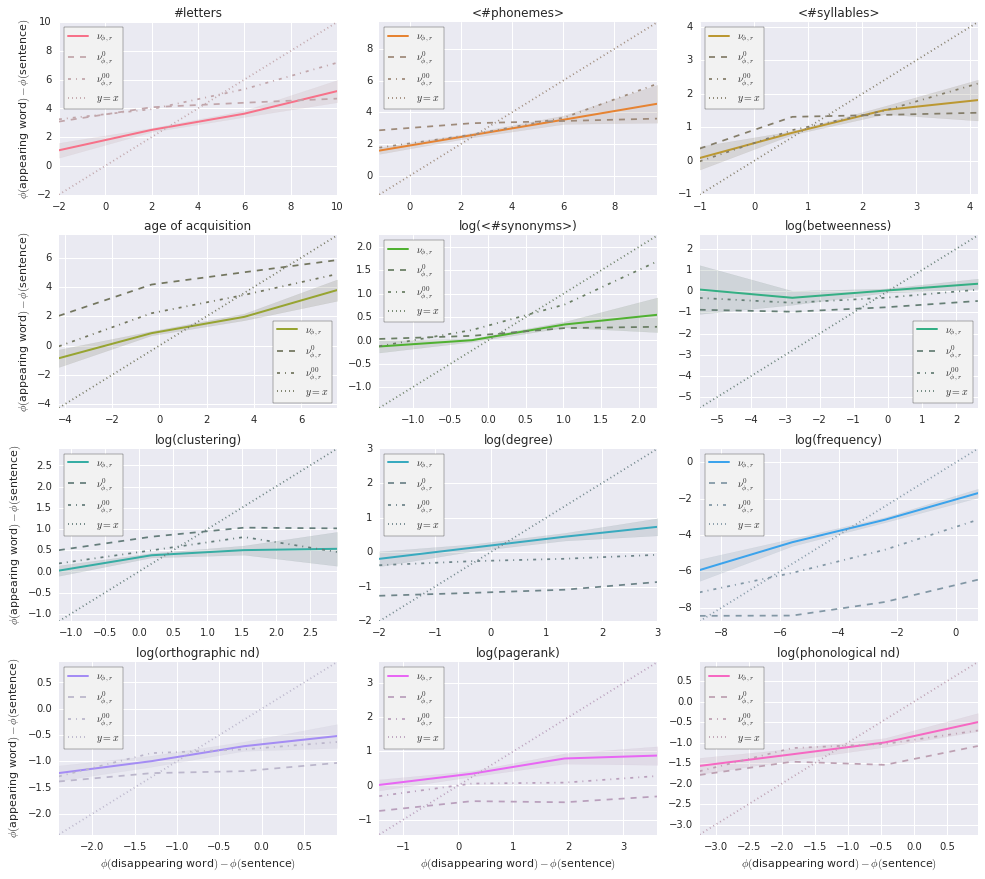

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

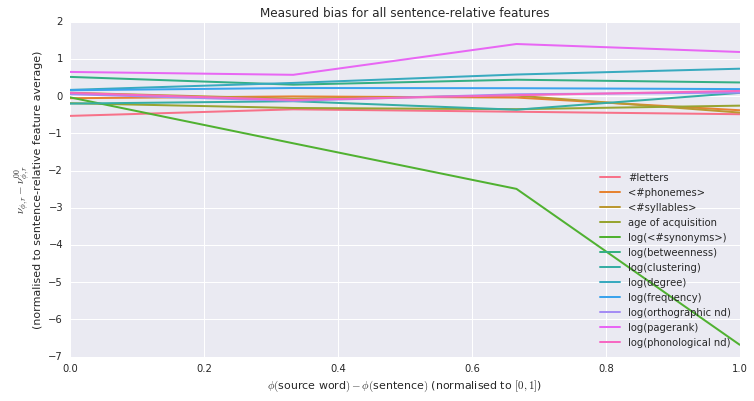

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | **  | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *   | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |


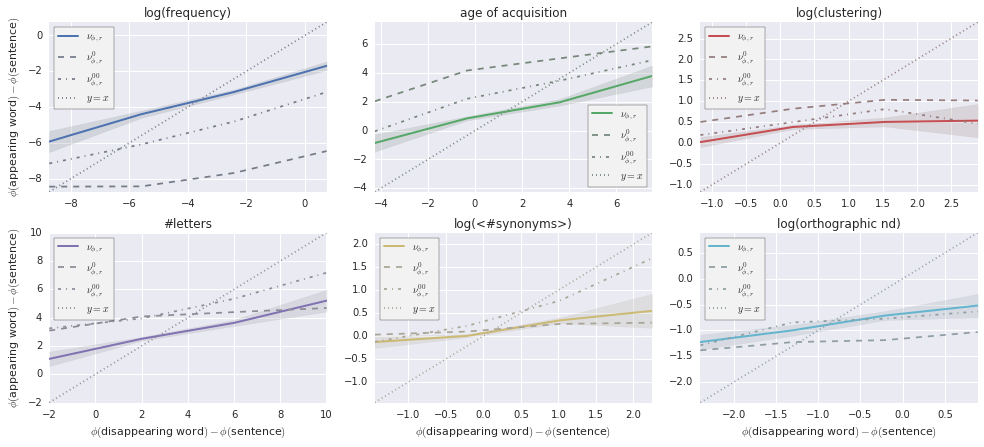

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

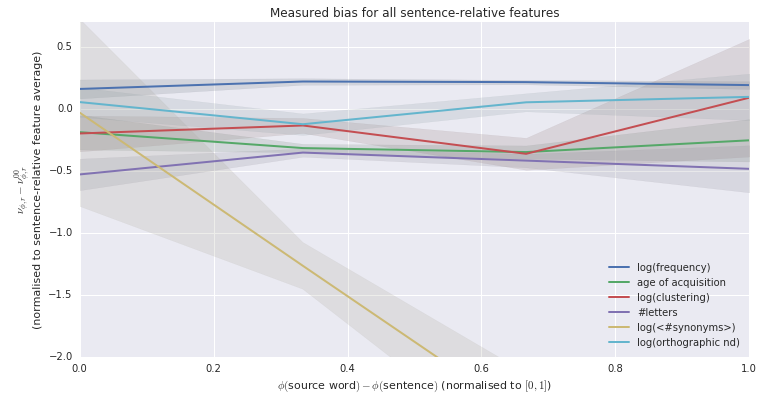

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | **  | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *   | *   |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *   | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | ns. | *   | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | ns. | **  | ns. | ns. |


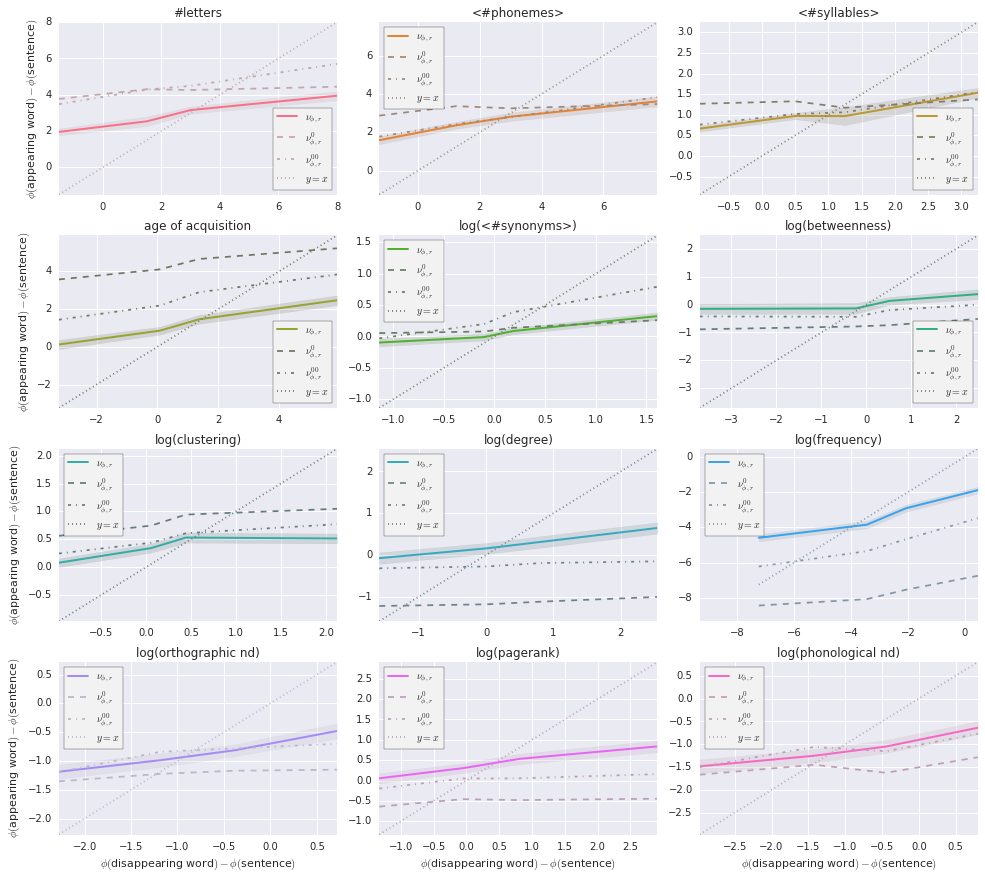

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

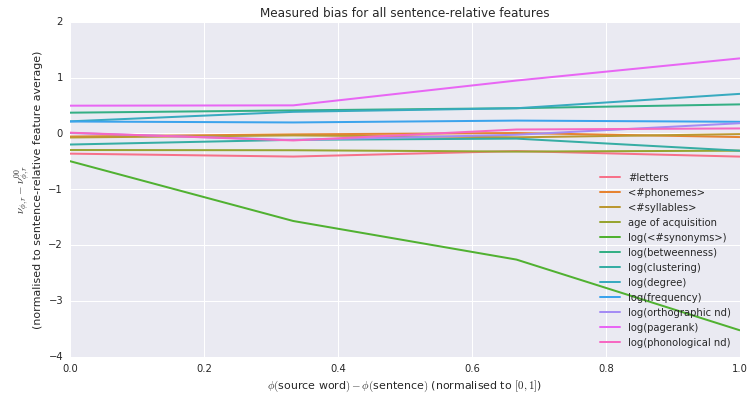

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *   | *   |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | *   | ns. | **  |


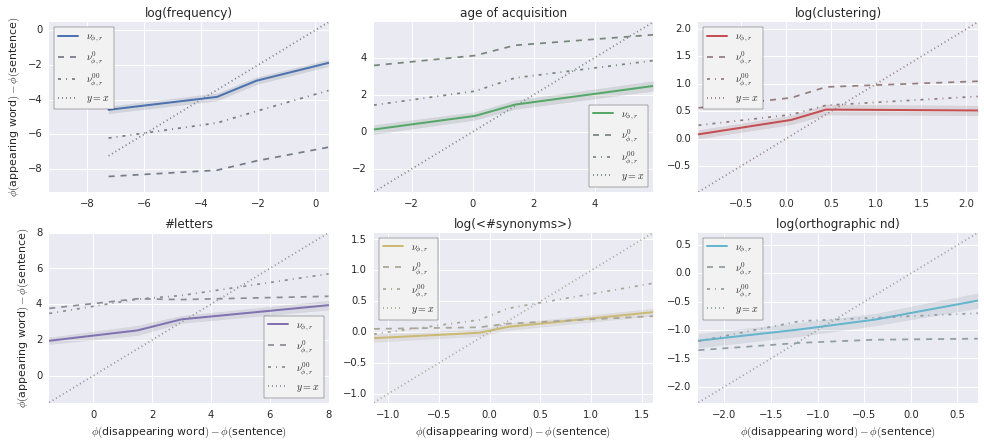

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

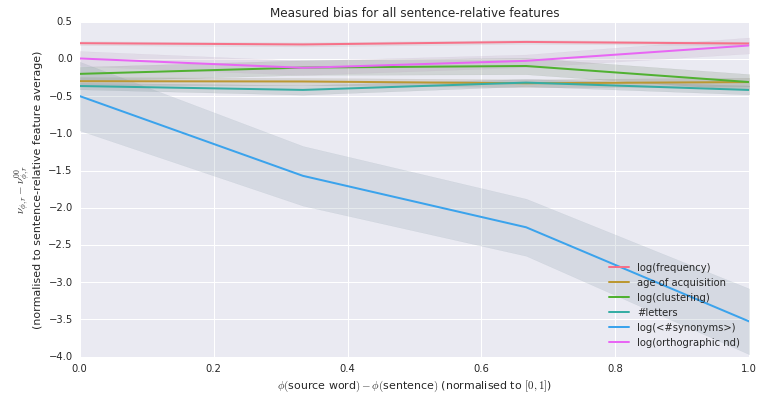

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


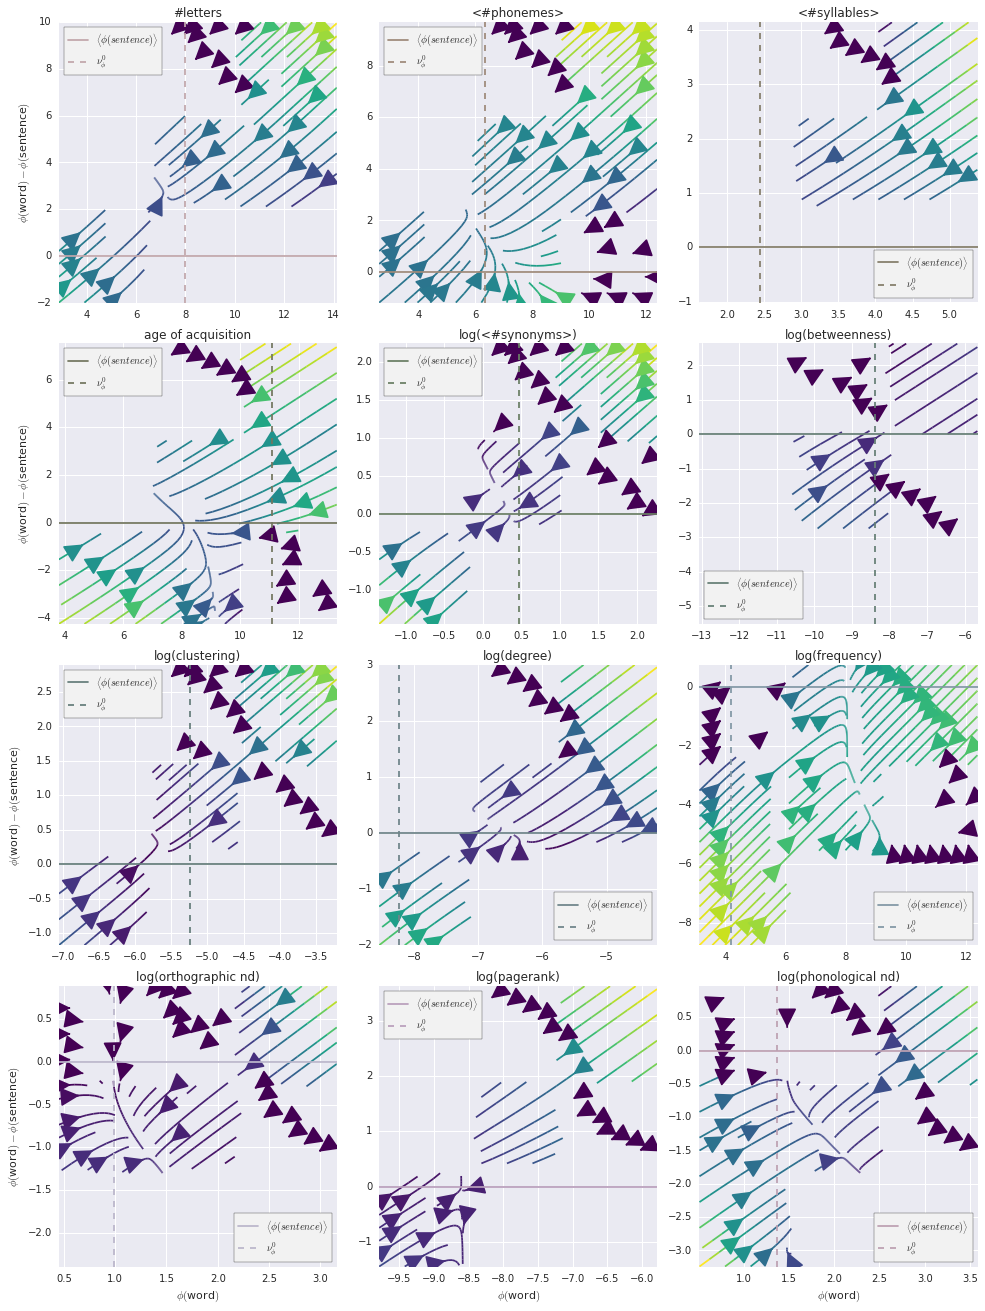

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


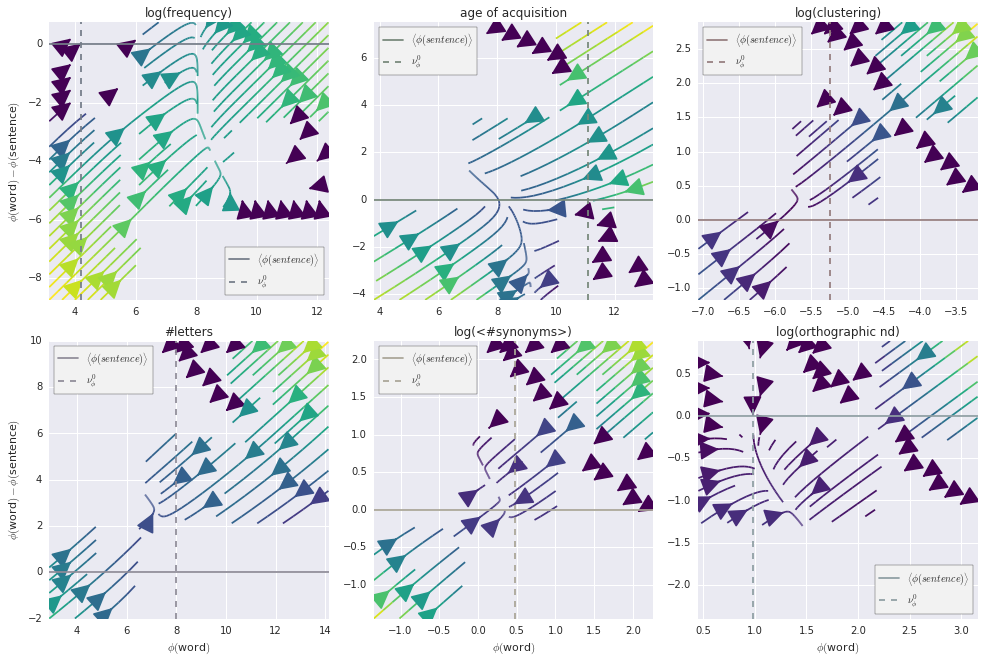

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54284167  0.16812967  0.07916533  0.07206606  0.03452181  0.02949849
  0.01832897  0.01781715  0.01706002  0.0085365 ]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.446262,0.276224,-0.087837,0.238706,0.225108,-0.445901,0.224235,0.279202,-0.420940,0.282661,-0.158210,0.000616
Component-1,0.328045,-0.409550,0.152141,-0.295563,-0.258442,-0.425448,0.157897,-0.306974,-0.418579,0.213053,-0.163004,0.004164
Component-2,0.735232,0.252298,-0.150948,0.095754,0.581154,-0.095967,0.002559,0.032680,-0.034140,0.089080,0.003244,-0.081795


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 2289) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  12 of 2289) |                       | Elapsed Time: 0:00:46 ETA: 2:26:30

  1% (  42 of 2289) |                       | Elapsed Time: 0:00:46 ETA: 0:41:33

  3% (  70 of 2289) |                       | Elapsed Time: 0:00:46 ETA: 0:24:44

  4% ( 100 of 2289) |#                      | Elapsed Time: 0:00:47 ETA: 0:17:10

  5% ( 126 of 2289) |#                      | Elapsed Time: 0:00:47 ETA: 0:00:19

  6% ( 158 of 2289) |#                      | Elapsed Time: 0:00:47 ETA: 0:00:18

  7% ( 183 of 2289) |#                      | Elapsed Time: 0:00:47 ETA: 0:00:18

  9% ( 215 of 2289) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:17

 10% ( 242 of 2289) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:18

 11% ( 270 of 2289) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:17

 12% ( 297 of 2289) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:18

 14% ( 327 of 2289) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:17

 15% ( 356 of 2289) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:17

 16% ( 384 of 2289) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:17

 17% ( 412 of 2289) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:16

 19% ( 440 of 2289) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:16

 20% ( 471 of 2289) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:16

 21% ( 497 of 2289) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:16

 23% ( 528 of 2289) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:15

 24% ( 557 of 2289) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:14

 25% ( 586 of 2289) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:14

 26% ( 613 of 2289) |######                 | Elapsed Time: 0:00:51 ETA: 0:00:14

 28% ( 643 of 2289) |######                 | Elapsed Time: 0:00:51 ETA: 0:00:14

 29% ( 672 of 2289) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:13

 30% ( 699 of 2289) |#######                | Elapsed Time: 0:00:52 ETA: 0:00:13

 31% ( 727 of 2289) |#######                | Elapsed Time: 0:00:52 ETA: 0:00:13

 33% ( 756 of 2289) |#######                | Elapsed Time: 0:00:52 ETA: 0:00:13

 34% ( 784 of 2289) |#######                | Elapsed Time: 0:00:53 ETA: 0:00:13

 35% ( 813 of 2289) |########               | Elapsed Time: 0:00:53 ETA: 0:00:13

 36% ( 840 of 2289) |########               | Elapsed Time: 0:00:53 ETA: 0:00:13

 38% ( 871 of 2289) |########               | Elapsed Time: 0:00:53 ETA: 0:00:12

 39% ( 901 of 2289) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:12

 40% ( 928 of 2289) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:12

 41% ( 957 of 2289) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:11

 43% ( 985 of 2289) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:11

 44% (1013 of 2289) |##########             | Elapsed Time: 0:00:55 ETA: 0:00:11

 45% (1042 of 2289) |##########             | Elapsed Time: 0:00:55 ETA: 0:00:11

 46% (1071 of 2289) |##########             | Elapsed Time: 0:00:55 ETA: 0:00:10

 48% (1099 of 2289) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:10

 49% (1129 of 2289) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:10

 50% (1159 of 2289) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:09

 51% (1188 of 2289) |###########            | Elapsed Time: 0:00:56 ETA: 0:00:09

 53% (1214 of 2289) |############           | Elapsed Time: 0:00:56 ETA: 0:00:08

 54% (1244 of 2289) |############           | Elapsed Time: 0:00:57 ETA: 0:00:08

 55% (1272 of 2289) |############           | Elapsed Time: 0:00:57 ETA: 0:00:08

 56% (1301 of 2289) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:08

 58% (1329 of 2289) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:08

 59% (1358 of 2289) |#############          | Elapsed Time: 0:00:58 ETA: 0:00:07

 60% (1386 of 2289) |#############          | Elapsed Time: 0:00:58 ETA: 0:00:07

 61% (1417 of 2289) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:07

 63% (1444 of 2289) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:07

 64% (1474 of 2289) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:07

 65% (1499 of 2289) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:06

 66% (1529 of 2289) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:06

 68% (1557 of 2289) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:06

 69% (1585 of 2289) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:06

 70% (1612 of 2289) |################       | Elapsed Time: 0:01:00 ETA: 0:00:06

 71% (1643 of 2289) |################       | Elapsed Time: 0:01:00 ETA: 0:00:05

 73% (1672 of 2289) |################       | Elapsed Time: 0:01:00 ETA: 0:00:05

 74% (1702 of 2289) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:05

 75% (1730 of 2289) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:04

 76% (1757 of 2289) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:04

 78% (1786 of 2289) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:04

 79% (1816 of 2289) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:04

 80% (1841 of 2289) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:03

 81% (1870 of 2289) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:03

 83% (1901 of 2289) |###################    | Elapsed Time: 0:01:02 ETA: 0:00:03

 84% (1930 of 2289) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:03

 85% (1957 of 2289) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:03

 86% (1987 of 2289) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:02

 88% (2017 of 2289) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:02

 89% (2045 of 2289) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:02

 90% (2074 of 2289) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:01

 91% (2102 of 2289) |#####################  | Elapsed Time: 0:01:04 ETA: 0:00:01

 92% (2128 of 2289) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:01

 94% (2158 of 2289) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:01

 95% (2186 of 2289) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:00

 96% (2214 of 2289) |###################### | Elapsed Time: 0:01:05 ETA: 0:00:00

 97% (2243 of 2289) |###################### | Elapsed Time: 0:01:06 ETA: 0:00:00

 99% (2274 of 2289) |###################### | Elapsed Time: 0:01:06 ETA: 0:00:00

100% (2289 of 2289) |######################| Elapsed Time: 0:01:06 Time: 0:01:06


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *   | ns. |


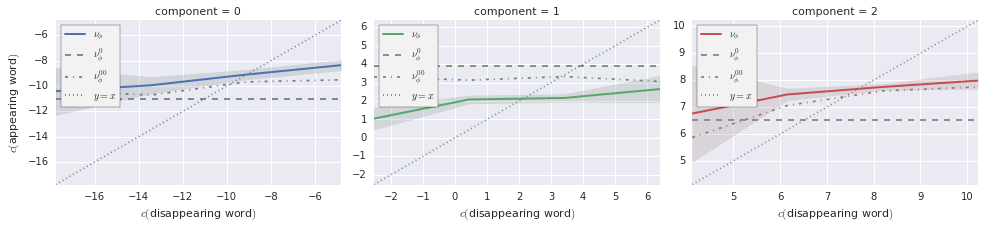

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68061225  0.18276911]



,aoa,frequency,letters_count
Component-0,-0.735242,0.386221,-0.557004
Component-1,0.422901,-0.380811,-0.822276


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 2289) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  1% (  29 of 2289) |                       | Elapsed Time: 0:00:03 ETA: 0:08:13

  3% (  73 of 2289) |                       | Elapsed Time: 0:00:03 ETA: 0:01:50

  5% ( 115 of 2289) |#                      | Elapsed Time: 0:00:03 ETA: 0:01:20

  7% ( 161 of 2289) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:55

  8% ( 201 of 2289) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:48

 10% ( 244 of 2289) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:13

 12% ( 287 of 2289) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:12

 14% ( 330 of 2289) |###                    | Elapsed Time: 0:00:05 ETA: 0:00:12

 16% ( 372 of 2289) |###                    | Elapsed Time: 0:00:05 ETA: 0:00:12

 18% ( 416 of 2289) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:12

 20% ( 458 of 2289) |####                   | Elapsed Time: 0:00:06 ETA: 0:00:12

 21% ( 503 of 2289) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:11

 23% ( 544 of 2289) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:11

 25% ( 589 of 2289) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:10

 27% ( 630 of 2289) |######                 | Elapsed Time: 0:00:07 ETA: 0:00:10

 29% ( 676 of 2289) |######                 | Elapsed Time: 0:00:07 ETA: 0:00:10

 31% ( 716 of 2289) |#######                | Elapsed Time: 0:00:07 ETA: 0:00:09

 33% ( 760 of 2289) |#######                | Elapsed Time: 0:00:08 ETA: 0:00:09

 35% ( 802 of 2289) |########               | Elapsed Time: 0:00:08 ETA: 0:00:09

 36% ( 845 of 2289) |########               | Elapsed Time: 0:00:08 ETA: 0:00:09

 38% ( 887 of 2289) |########               | Elapsed Time: 0:00:08 ETA: 0:00:08

 40% ( 932 of 2289) |#########              | Elapsed Time: 0:00:09 ETA: 0:00:08

 42% ( 973 of 2289) |#########              | Elapsed Time: 0:00:09 ETA: 0:00:08

 44% (1018 of 2289) |##########             | Elapsed Time: 0:00:09 ETA: 0:00:08

 46% (1059 of 2289) |##########             | Elapsed Time: 0:00:09 ETA: 0:00:07

 48% (1105 of 2289) |###########            | Elapsed Time: 0:00:10 ETA: 0:00:07

 50% (1145 of 2289) |###########            | Elapsed Time: 0:00:10 ETA: 0:00:07

 52% (1193 of 2289) |###########            | Elapsed Time: 0:00:10 ETA: 0:00:06

 53% (1231 of 2289) |############           | Elapsed Time: 0:00:10 ETA: 0:00:06

 55% (1276 of 2289) |############           | Elapsed Time: 0:00:11 ETA: 0:00:06

 57% (1317 of 2289) |#############          | Elapsed Time: 0:00:11 ETA: 0:00:05

 59% (1362 of 2289) |#############          | Elapsed Time: 0:00:11 ETA: 0:00:05

 61% (1403 of 2289) |##############         | Elapsed Time: 0:00:12 ETA: 0:00:05

 63% (1448 of 2289) |##############         | Elapsed Time: 0:00:12 ETA: 0:00:05

 65% (1488 of 2289) |##############         | Elapsed Time: 0:00:12 ETA: 0:00:04

 67% (1534 of 2289) |###############        | Elapsed Time: 0:00:12 ETA: 0:00:04

 68% (1574 of 2289) |###############        | Elapsed Time: 0:00:13 ETA: 0:00:04

 70% (1617 of 2289) |################       | Elapsed Time: 0:00:13 ETA: 0:00:04

 72% (1660 of 2289) |################       | Elapsed Time: 0:00:13 ETA: 0:00:03

 74% (1706 of 2289) |#################      | Elapsed Time: 0:00:13 ETA: 0:00:03

 76% (1746 of 2289) |#################      | Elapsed Time: 0:00:14 ETA: 0:00:03

 78% (1792 of 2289) |##################     | Elapsed Time: 0:00:14 ETA: 0:00:03

 80% (1832 of 2289) |##################     | Elapsed Time: 0:00:14 ETA: 0:00:02

 81% (1876 of 2289) |##################     | Elapsed Time: 0:00:14 ETA: 0:00:02

 83% (1918 of 2289) |###################    | Elapsed Time: 0:00:15 ETA: 0:00:02

 85% (1962 of 2289) |###################    | Elapsed Time: 0:00:15 ETA: 0:00:02

 87% (2003 of 2289) |####################   | Elapsed Time: 0:00:15 ETA: 0:00:01

 89% (2048 of 2289) |####################   | Elapsed Time: 0:00:15 ETA: 0:00:01

 91% (2089 of 2289) |####################   | Elapsed Time: 0:00:16 ETA: 0:00:01

 93% (2134 of 2289) |#####################  | Elapsed Time: 0:00:16 ETA: 0:00:00

 95% (2175 of 2289) |#####################  | Elapsed Time: 0:00:16 ETA: 0:00:00

 96% (2220 of 2289) |###################### | Elapsed Time: 0:00:17 ETA: 0:00:00

 98% (2261 of 2289) |###################### | Elapsed Time: 0:00:17 ETA: 0:00:00

100% (2289 of 2289) |######################| Elapsed Time: 0:00:17 Time: 0:00:17


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


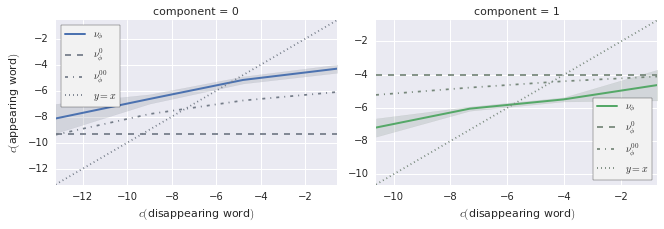

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1839 (cluster-unique) substitutions, but the PCA is in fact computed on 1463 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
    * global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative


  *** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


   ** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1135 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.05092761799769541

intercept                      5.569300
global_aoa                     0.033309
global_clustering             -0.055170
global_frequency               0.298179
global_letters_count          -0.014794
global_orthographic_density   -0.039255
global_synonyms_count          0.064807
dtype: float64

Regressing global frequency with 1135 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.06634161286796303

intercept                                              10.353287
global_aoa                                              0.152916
global_clustering                                       0.751890
global_frequency                                        0.517993
global_letters_count                                   -1.124183
global_orthographic_density                            -0.823061
glo

Regressing rel frequency with 1135 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.19745004254322276

intercept                  -1.740440
rel_aoa                     0.032460
rel_clustering              0.097993
rel_frequency               0.571919
rel_letters_count          -0.099101
rel_orthographic_density   -0.187356
rel_synonyms_count          0.064502
dtype: float64

Regressing rel frequency with 1135 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.215912806392616

intercept                                       -1.876178
rel_aoa                                         -0.063971
rel_clustering                                   0.090319
rel_frequency                                    0.568069
rel_letters_count                               -0.014488
rel_orthographic_density                        -0.387956
rel_synonyms_count                               0.366594
rel_aoa * rel_clustering                        -0.040314
rel_aoa * rel_frequency            

intercept                                                -10.950951
global_aoa                                                -0.344355
global_clustering                                         -6.457858
global_frequency                                          -0.356258
global_letters_count                                      -1.095109
global_orthographic_density                               -0.094467
global_synonyms_count                                     -6.686727
rel_aoa                                                    0.783575
rel_clustering                                             9.963923
rel_frequency                                              1.854277
rel_letters_count                                          0.333635
rel_orthographic_density                                  -0.068623
rel_synonyms_count                                         6.939867
global_aoa * global_clustering                             0.301551
global_aoa * global_frequency                   

Regressing global aoa with 1035 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.049905971815738526

intercept                                        6.555986
rel_aoa                                         -0.153623
rel_clustering                                   0.072446
rel_frequency                                   -0.025082
rel_letters_count                                0.014885
rel_orthographic_density                        -0.567006
rel_synonyms_count                              -0.764458
rel_aoa * rel_clustering                        -0.003751
rel_aoa * rel_frequency                         -0.045174
rel_aoa * rel_letters_count                      0.040881
rel_aoa * rel_orthographic_density               0.031635
rel_aoa * rel_synonyms_count                    -0.024989
rel_clustering * rel_frequency                   0.099587
rel_clustering * rel_letters_count               0.198913
rel_clustering * rel_orthographic_density        0.023404
rel_clustering * rel

Regressing rel aoa with 1035 measures, with interactions
           ^^^^^^^
R^2 = 0.233117501250661

intercept                                                -0.271380
global_aoa                                                0.416959
global_clustering                                         0.930300
global_frequency                                          2.258472
global_letters_count                                     -0.655168
global_orthographic_density                              -7.062027
global_synonyms_count                                    -0.881407
rel_aoa                                                   0.850907
rel_clustering                                           -3.389955
rel_frequency                                            -0.881807
rel_letters_count                                         2.592401
rel_orthographic_density                                  8.839634
rel_synonyms_count                                       -4.444725
global_aoa * global_clusteri

Regressing global clustering with 915 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.015073500365170411

intercept                                       -5.800011e+00
rel_aoa                                         -1.731629e-02
rel_clustering                                   4.120036e-02
rel_frequency                                   -3.704124e-03
rel_letters_count                               -8.451542e-07
rel_orthographic_density                         8.055076e-02
rel_synonyms_count                              -1.183780e-01
rel_aoa * rel_clustering                         3.442701e-03
rel_aoa * rel_frequency                         -8.702757e-03
rel_aoa * rel_letters_count                     -5.412612e-03
rel_aoa * rel_orthographic_density              -9.715018e-03
rel_aoa * rel_synonyms_count                    -1.087327e-02
rel_clustering * rel_frequency                   1.916351e-03
rel_clustering * rel_letters_count               1.309215e-02
rel_clust

Regressing rel clustering with 915 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.24919254038601546

intercept                                                -3.837078
global_aoa                                                0.629840
global_clustering                                         0.376015
global_frequency                                         -0.127867
global_letters_count                                      1.382205
global_orthographic_density                              -0.055725
global_synonyms_count                                    -3.528995
rel_aoa                                                  -0.087837
rel_clustering                                           -1.694457
rel_frequency                                            -0.549840
rel_letters_count                                        -1.273947
rel_orthographic_density                                  0.681801
rel_synonyms_count                                        1.751633
global_aoa * 

Regressing global letters_count with 1135 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.066102712156896

intercept                                        5.861061
rel_aoa                                         -0.110882
rel_clustering                                   0.099281
rel_frequency                                    0.089922
rel_letters_count                                0.239315
rel_orthographic_density                        -0.419682
rel_synonyms_count                              -0.765463
rel_aoa * rel_clustering                         0.091384
rel_aoa * rel_frequency                         -0.038050
rel_aoa * rel_letters_count                     -0.043706
rel_aoa * rel_orthographic_density              -0.030657
rel_aoa * rel_synonyms_count                    -0.173503
rel_clustering * rel_frequency                  -0.005788
rel_clustering * rel_letters_count               0.036474
rel_clustering * rel_orthographic_density        0.130330
rel

Regressing rel letters_count with 1135 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.19681533614201221

intercept                                                 12.140777
global_aoa                                                 0.636171
global_clustering                                          4.456707
global_frequency                                           1.435915
global_letters_count                                      -2.631710
global_orthographic_density                               -2.139042
global_synonyms_count                                      7.096952
rel_aoa                                                   -0.237994
rel_clustering                                            -9.283586
rel_frequency                                              0.637049
rel_letters_count                                          4.148247
rel_orthographic_density                                  -0.029425
rel_synonyms_count                                        -4.

Regressing global synonyms_count with 1096 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.020760430043277767

intercept                                        0.392315
rel_aoa                                         -0.024388
rel_clustering                                  -0.084479
rel_frequency                                    0.014669
rel_letters_count                                0.009902
rel_orthographic_density                         0.038145
rel_synonyms_count                               0.101499
rel_aoa * rel_clustering                        -0.019867
rel_aoa * rel_frequency                         -0.012715
rel_aoa * rel_letters_count                     -0.008540
rel_aoa * rel_orthographic_density              -0.011794
rel_aoa * rel_synonyms_count                     0.013197
rel_clustering * rel_frequency                  -0.010998
rel_clustering * rel_letters_count              -0.002640
rel_clustering * rel_orthographic_density       -0.07392

Regressing rel synonyms_count with 1096 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.18356355602772723

intercept                                                 3.490825
global_aoa                                                0.101985
global_clustering                                         0.886106
global_frequency                                         -0.357059
global_letters_count                                      0.219466
global_orthographic_density                               0.936720
global_synonyms_count                                     0.012578
rel_aoa                                                  -0.090790
rel_clustering                                           -0.641498
rel_frequency                                            -0.027317
rel_letters_count                                        -0.494223
rel_orthographic_density                                 -0.777737
rel_synonyms_count                                       -1.657917
glob

Regressing global orthographic_density with 913 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.05167633673783811

intercept                                        1.519483
rel_aoa                                          0.087337
rel_clustering                                  -0.042923
rel_frequency                                   -0.039625
rel_letters_count                               -0.013789
rel_orthographic_density                         0.293988
rel_synonyms_count                               0.356269
rel_aoa * rel_clustering                         0.029791
rel_aoa * rel_frequency                          0.030615
rel_aoa * rel_letters_count                      0.009093
rel_aoa * rel_orthographic_density               0.025487
rel_aoa * rel_synonyms_count                     0.061400
rel_clustering * rel_frequency                  -0.011934
rel_clustering * rel_letters_count              -0.007352
rel_clustering * rel_orthographic_density     

Regressing rel orthographic_density with 913 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.15125169697148866

intercept                                                 6.492047
global_aoa                                               -0.462360
global_clustering                                         1.103992
global_frequency                                         -0.736879
global_letters_count                                     -0.053744
global_orthographic_density                               2.536639
global_synonyms_count                                     1.066743
rel_aoa                                                  -0.077452
rel_clustering                                            0.766823
rel_frequency                                             0.442770
rel_letters_count                                        -0.190153
rel_orthographic_density                                 -2.965736
rel_synonyms_count                                        1.